
<h1 style="text-align: center; background-color:  #003d99; opacity: 0.7; padding: 30px; color: white; border-radius: 8px; border-left: 6px solid red">  Aula 5 - Arquivos NetCDF / Xarray / Cartopy </h1>
<a id='section_id1'></a>


---

# Índice

[**Aula 5 - Arquivos NetCDF / Xarray / Cartopy**](#section_id1)
- [1. NetCDF4](#section_id2)
- [2. Xarray](#section_id3)
- [3. Cartopy](#section_id4)


# 1. NetCDF4


<a id='section_id2'></a>


<div class="alert alert-block alert-success">


<b> A extensão NetCDF é utilizada para armazenamento de grande quantidade de dados de forma a acessar dados orientados a matrizes em três dimensões possuindo suporte para diversas linguagens como C, Fortran, C++, Java e etc. A bilioteca [**netCDF4**](https://unidata.github.io/netcdf4-python/) pode ser utilizada para trabalhar com arquivos netcdf.
<b>
    </div>

Se você não possui a biblioteca netCDF4, instale utilizando os seguintes comandos:

<p style="background:black">
<code style="background:black;color:white">pip install netCDF4
</code>
</p>

Da biblioteca netCDF4, importaremos somente duas funções.

In [2]:
from netCDF4 import Dataset,num2date
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">

<b> Para exercitar a importação e manipulação de arquivos NetCDF, utilizaremos o arquivo **'BEC_SSS___SMOS__GLO_L4__B_20180101T120000_0.05d_1d_REP_v002.nc'**. O arquivo contém dados de Salinidade da Superfice do Mar e são derivados dos dados do satélite [**SMOS**]( provido pela [Agência Espacial Europeia(ESA)](https://www.esa.int/). O dado em questão foi adquirido via FTP no site [Barcelona Expert Center](http://bec.icm.csic.es/).
    </div>

Utilizaremos a função [**Dataset**] para importar os dados.

In [3]:
dado = Dataset('../dados/BEC_SSS___SMOS__GLO_L4__B_20180101T120000_0.05d_1d_REP_v002.nc')

Uma das grandes vantagens de trabalhar com dados NetCDF é a grande quantidade de informações que podem estar contidas no arquivo. 

Assim como nos dicionários e nos Dataframes, acessaremos as informações da seguinte forma:

In [4]:
dado.description

'BEC L4 product resulting from singularity analysis BEC binned L3 product and sea surface temperature (SST) provided daily by Operational Sea Surface Temperature and Sea Ice Analysis (OSTIA) system. Visit http://ghrsst-pp.metoffice.com/pages/latest_analysis/ostia.html for additional information about OSTIA system'

Podemos acessar as informações de todas as variaveis

In [5]:
dado.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     standard_name: time
     long_name: Time
     units: seconds since 1970-1-1 00:00:00
     time: T
     calendar: gregorian
 unlimited dimensions: time
 current shape = (1,)
 filling on, default _FillValue of -2147483647 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     standard_name: latitude
     long_name: Latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (3600,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     standard_name: longitude
     long_name: Longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (7200,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'sss': <class 'netCDF4._netCDF4.Variable'>
 float32 sss(time, lat, lon)
     units: 1
     standard_name: sea_surface_salinity
     long_name: Level 4 Sea Surface Salinit

In [6]:
dado.variables.keys()

dict_keys(['time', 'lat', 'lon', 'sss'])

Temos, portanto, um arquivo netCDF que armazena 4 variáveis. Vamos acessar cada uma das variáveis e atribuir á outras variáveis facilitando entao o manuseio do dado. Vamos nos atentar também para a informação contida em **"dimensions(sizes)"** do arquivo netCDF. 

In [7]:
dado.dimensions

{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1,
 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 3600,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 7200}

Nesse arquivo temos a dimensão de time(size = 1), lat(size = 3600) e lon(size = 7200), isto é, temos apenas um passo de tempo. 

Um arquivo NetCDF pode armazenar diversas variáveis, entre matrizes como é o caso da Salinidade contida no nosso arquivo exemplo e arrays como é o caso da Latitude, Longitude e Tempo. A figura abaixo pode nos ajudar a esclarecer a estutura dos dados em um arquivo netcdf. 

![texto alternativo](https://www.researchgate.net/publication/315950787/figure/fig3/AS:567797237248005@1512384818972/An-example-of-how-a-dataset-netCDF-or-xarray-for-a-weather-forecast-might-be.png)

Agora que conhecemos melhor o nosso dado, podemos atribuir cada uma das variáveis à variáveis locais. O tempo deve ser convertido para o calendario gregoriano, para isso, utilizaremos a função **num2date()**. Depos de atribuir as nossas novas varáveis, vamos fechar o arquivo netcdf com o **.close()**

In [8]:
lat = dado.variables['lat'][:]# é importante selecionar todos os elementos do array.
lon = dado.variables['lon'][:]
sss = dado.variables['sss'][:,:]
time = num2date(dado.variables['time'][:],dado.variables['time'].units)
dado.close()

In [9]:
time

masked_array(data=[cftime.DatetimeGregorian(2018, 1, 1, 0, 0, 0, 0)],
             mask=False,
       fill_value='?',
            dtype=object)

<div class="alert alert-block alert-info">

<b> A biblioteca NetCDF4 é importante e para a importação e escrita de arquivos netCDF, porém, bibliotecas como o Xarray podem facilitar muito na manipulação dos dados. Nessa aula, abordaremos as duas bibliotecas, dessa forma, você pode escolher qual que se encaixa mais na sua necessidade. 
    </div>


# 2. Xarray 
<a id='section_id3'></a>


<div class="alert alert-block alert-success">


<b> [**Xarray**](http://xarray.pydata.org/en/stable/) é um pacote em Python para trabalhar com matrizes multidimensionais e arquivos NetCDF. O pacote inclui diversas funções para analises avançadas e ótima visualização dos dados. O xarray é inspirado no Pandas e muitos dos métodos do Dataframe poderão ser aplicados em matrizes Xarray.
<b>
    </div>

In [10]:
import xarray as xr

De forma muito semelhante à seção anterior, faremos a importação dos dados do SMOS para exercitar a utilização do Xarray. O método xarray para importação dos dados é o [**open_dataset()**](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html)

In [20]:
dado2 = xr.open_dataset('../dados/BEC_SSS___SMOS__GLO_L4__B_20180101T120000_0.05d_1d_REP_v002.nc')

Como você pode observar, o dado é organizado de forma tabular, muito parecido com o Pandas Dataframe.

In [21]:
dado2

<xarray.Dataset>
Dimensions:  (lat: 3600, lon: 7200, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * lat      (lat) float32 -89.97 -89.93 -89.88 -89.82 ... 89.88 89.93 89.97
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
Data variables:
    sss      (time, lat, lon) float32 ...
Attributes: (12/28)
    title:                      Global SMOS Level 4 Sea Surface Salinity file
    institution:                Barcelona Expert Center (BEC), ICM-CSIC, Barc...
    references:                 SSS have been retrieved following the algorit...
    copyright:                  BEC research products are freely distributed....
    Conventions:                CF-1.4
    date_created:               2020-02-04 16:28:06 GMT
    ...                         ...
    license:                    This product is distributed under Creative Co...
    license_url:                https://creativecommons.org/licenses/by/4.0/
    comment:                    These data were produced at BEC as part of th...
    history:                    Thu Jun 18 23:37:21 2020: ncap2 -O -s time[ti...
    NCO:                        netCDF Operators version 4.7.5 (Homepage = ht...
    nco_openmp_thread_number:   1

Uma das vantagens é que a matriz Xarray já converte automaticamente o nosso array de tempo. Voce pode evitar isso utilizando **decode_times=False** dentro da função open_dataset.

In [22]:
dado2.time

<xarray.DataArray 'time' (time: 1)>
array(['2018-01-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
Attributes:
    standard_name:  time
    long_name:      Time
    time:           T

In [14]:
dado2.sss

<xarray.DataArray 'sss' (time: 1, lat: 3600, lon: 7200)>
[25920000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * lat      (lat) float32 -89.97 -89.93 -89.88 -89.82 ... 89.88 89.93 89.97
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
Attributes:
    units:          1
    standard_name:  sea_surface_salinity
    long_name:      Level 4 Sea Surface Salinity
    description:    Level 4 Sea Surface Salinity in Practical Salinity Units ...

A integração do Xarray com o matplotlib também nos permite uma rápida visualização dos dados utilizando o método [**.plot()**](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.plot.html)

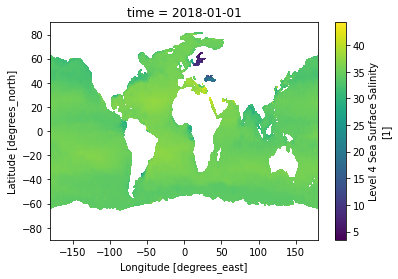

In [15]:
dado2.sss.plot()

Uma das vantagens do [**DataArray**](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html) é que podemos selecionar e fatiar os dados de forma muito intuitiva e rápida utilizando o método [**isel()**](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.isel.html). 

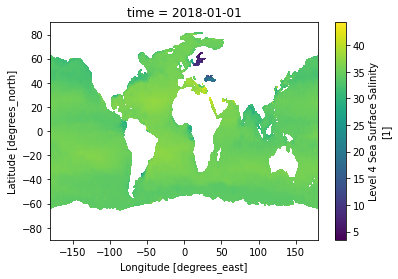

In [16]:
dado2.sss.isel(time=0).plot()

No exemplo acima selecionamos o primeiro e único passo de tempo. Podemos usar o mesmo método para fazer um <em>subset</em> do nosso dado com intervalos definidos, para isso, utilizaremos o método **slice()**. No caso, selecionaremos a região do Atlântico Sul. <br>

Pesquise a diferença entre os métodos **sel** e **isel**.

In [18]:
subset = dado2.sss.sel(lat=slice(-50,5),lon=slice(-50,20))

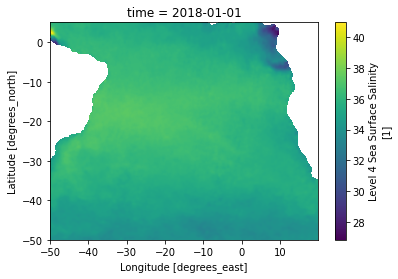

In [19]:
subset.plot()

# 3. Cartopy

<a id='section_id4'></a>


<div class="alert alert-block alert-success">


<b> [**Catopy**](http://xarray.pydata.org/en/stable/) é um pacote Python para fazer mapas e visualizar dados. 
<b>
    </div>

Utilizando o cartopy e o matplotlib, podemos fazer mapas de forma fácil.

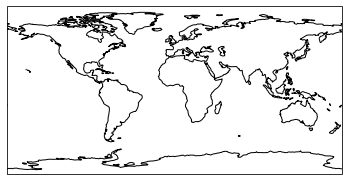

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

Uma lista com as projeções disponíveis pode ser encontrado na [lista de projeções do Cartopy](https://scitools.org.uk/cartopy/docs/v0.13/crs/projections.html#cartopy-projections)

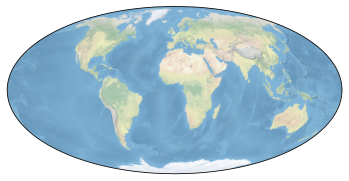

In [24]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

Podemos utilizar o Cartopy para fazer mapas de Salinidade da Superficie do Mar.

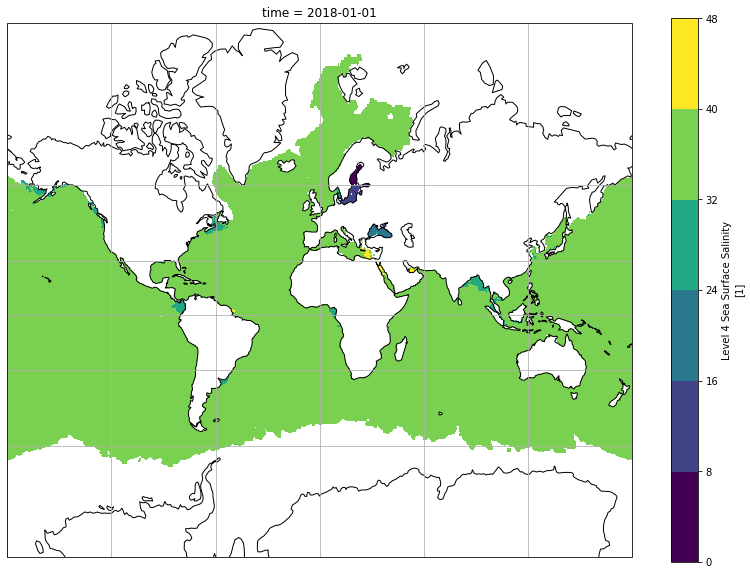

In [25]:
plt.figure(figsize=(14,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
dado2.sss.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()


Adicionando uma colormap e controlando os "levels" da nossa colorbar, podemos otimizar a visualização dos nossos dados. Para isso, utilizaremos o pacote de colormaps direcionado à Oceanografia [**cmocean**](https://matplotlib.org/cmocean/).

In [28]:
from cmocean import cm
import numpy as np
levels = np.arange(5,40,0.25)
levels2= [4,8,10,12,15,20,22,25,27,29,35,36,37,40]

In [ ]:
plt.figure(figsize=(14,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
ax.coastlines()


cf = dado2.sss.isel(time=0).plot.contourf(ax=ax, 
                                         transform=ccrs.PlateCarree(),
                                         cmap=cm.haline,
                                         levels=levels
                                        )

Podemos fazer um plot de contorno assim como o utilizado na [**Aula 4**](https://github.com/calixtops/OEPY/blob/main/nb/OEPY_B1%20-%20Aula%204%20-%20Pandas%20%2B%20CTD.ipynb) para plotar o Diagrama TS, e assim, visualizar melhor os valores de SSS. 

In [ ]:
plt.figure(figsize=(14,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
ax.coastlines()

cf = dado2.sss.isel(time=0).plot.contourf(ax=ax, 
                                         transform=ccrs.PlateCarree(),
                                         cmap=cm.haline,
                                         levels=levels
                                        )

ct = dado2.sss.isel(time=0).plot.contour(ax=ax, 
                                         transform=ccrs.PlateCarree(),
                                         levels=levels2,
                                         colors='0.7'
                                        )

ax.clabel(ct, inline= 1,fontsize=12,fmt='%1.0f',colors='1') # inserindo os valores de densidade nas linhas contornadas


Acesse a documentação do [**Cartopy**] e pesquise sobre os métodos que utilizamos.<br>
- set_global()
- coastlines()
- set_extent()

Se você estiver com problemas para executar essa aula no seu computador, experimente o [Google Collaboratory](https://colab.research.google.com/)

<div class="alert alert-block alert-warning">Nas próximas aulas, aprimoraremos a utilização do Xarray para ler multiplos arquivos netcdf, trabalhar com datas e fazer séries temporais.</div>

---

<img  style=" width: 75px; height:85%; width: 25%" src="https://raw.githubusercontent.com/calixtops/ES/main/img/logo_OEPY.png">